In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import subprocess as sp

In [3]:
yupper,ylower = 1,0 # Setting up gridspace and parameters
xupper,xlower = 1,0
del_x, del_y = 0.01,0.01
k_constant = 1/(4*np.pi*8.854*10**-12) # A physical constant, k
del_t = 0.001 # delta time
tupper, tlower = 10,0 # length of the time interval
timearray =  np.linspace(tlower,tupper,num=int((tupper-tlower)/del_t)+1)
ro = 10**-9
b_fixed = np.pi*ro*del_x*del_y*k_constant # a constant I use


xcoords = np.linspace(xlower,xupper,num=int((xupper-xlower)/del_x)+1)
ycoords = np.linspace(ylower,yupper,num=int((yupper-ylower)/del_y)+1)
# print(timearray)

In [5]:
# initializing stuff

V = np.empty([int((xupper-xlower)/del_x)+1,int((yupper-ylower)/del_y)+1])

for i in range(len(xcoords)):
    for j in range(len(ycoords)):
        if i==0 or i==len(xcoords)-1 or j==0 or j==len(ycoords)-1:
            V[i][j]=0
        else:
            V[i][j]=1

# print(V[:][:])

Vtemp=V

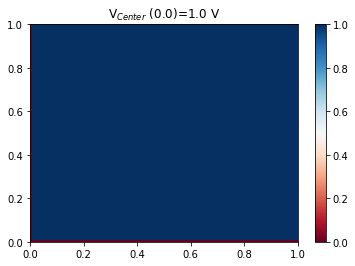

'\n\n  average = V[int((len(xcoords)-1)/2)][int((len(ycoords)-1)/2)]\n  string="V$_{Center}$ ("+str(timearray[t])[0:5]+")="+str(average)[0:5]+" V"\n  \n  fig, ax = plt.subplots()\n\n  c = ax.pcolormesh(xcoords, ycoords, V, cmap=\'RdBu\')\n  ax.set_title(string)\n  # set the limits of the plot to the limits of the data\n  ax.axis([xcoords.min(), xcoords.max(), ycoords.min(), ycoords.max()])\n  fig.colorbar(c, ax=ax)\n  plt.pause(del_t)\n'

<Figure size 432x288 with 0 Axes>

In [7]:
# timearray[0] = V

average = V[int((len(xcoords)-1)/2)][int((len(ycoords)-1)/2)]
string="V$_{Center}$ ("+str(timearray[0])[0:5]+")="+str(average)[0:5]+" V"

fig, ax = plt.subplots()

c = ax.pcolormesh(xcoords, ycoords, V, cmap='RdBu')
ax.set_title(string)
# set the limits of the plot to the limits of the data
ax.axis([xcoords.min(), xcoords.max(), ycoords.min(), ycoords.max()])
fig.colorbar(c, ax=ax)
plt.pause(del_t)
plt.clf()

for t in range (1,len(timearray)):
    for i in range(1,len(xcoords)-1): # calculate everything
        for j in range(1,len(ycoords)-1):
            V[i][j] = ((Vtemp[i-1][j]+Vtemp[i+1][j]+Vtemp[i][j+1]+Vtemp[i][j-1])/4)+b_fixed
    Vtemp = V
#   timearray[t]=V[i][j]
#   print("Cooking for",timearray[t],"s")
'''

  average = V[int((len(xcoords)-1)/2)][int((len(ycoords)-1)/2)]
  string="V$_{Center}$ ("+str(timearray[t])[0:5]+")="+str(average)[0:5]+" V"
  
  fig, ax = plt.subplots()

  c = ax.pcolormesh(xcoords, ycoords, V, cmap='RdBu')
  ax.set_title(string)
  # set the limits of the plot to the limits of the data
  ax.axis([xcoords.min(), xcoords.max(), ycoords.min(), ycoords.max()])
  fig.colorbar(c, ax=ax)
  plt.pause(del_t)
'''
#   sp.call('cls',shell=True)

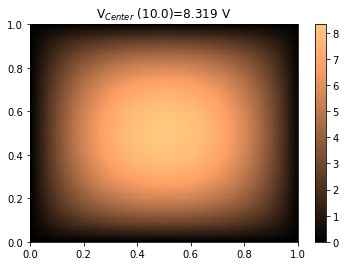

In [8]:
average = V[int((len(xcoords)-1)/2)][int((len(ycoords)-1)/2)]
string="V$_{Center}$ ("+str(timearray[t])[0:5]+")="+str(average)[0:5]+" V"

fig, ax = plt.subplots()

c = ax.pcolormesh(xcoords, ycoords, V, cmap='copper')
ax.set_title(string)
# set the limits of the plot to the limits of the data
ax.axis([xcoords.min(), xcoords.max(), ycoords.min(), ycoords.max()])
fig.colorbar(c, ax=ax)
# plt.pause(del_t)

fig.savefig("FinalTimeVGraph.png",dpi=300)

plt.show()